In [6]:
import cv2
import matplotlib.pyplot as plt

import pytesseract
import os
pytesseract.pytesseract.tesseract_cmd = r'C://Program Files//Tesseract-OCR//tesseract.exe'

os.environ["TESSDATA_PREFIX"] =  "C://Program Files//Tesseract-OCR//tessdata"
custom_config = r'-c preserve_interword_spaces=5 --oem 3 --psm 10 '

In [7]:
# Calculate skew angle of an image
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    edges = cv2.Canny(blur, 50, 200)

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilate = cv2.dilate(edges, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # plot
    plt.axis('off');
    plt.imshow(dilate,cmap='gray');
    plt.show();
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

In [8]:
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [9]:
img = cv2.imread('test_o.png')

65


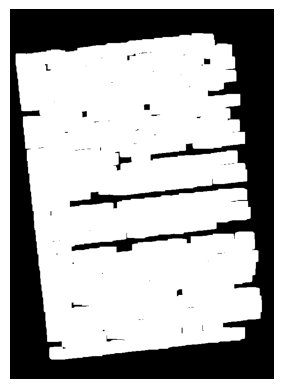

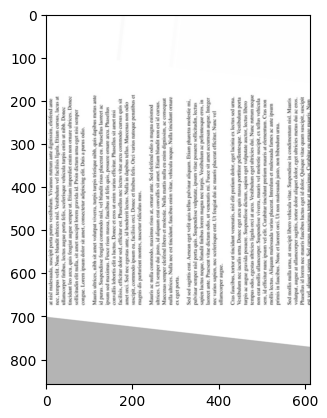

In [11]:
plt.axis('off');
plt.imshow(img);
deskewed_image = deskew(img)
plt.imshow(deskewed_image);

In [14]:
text = pytesseract.image_to_string(deskewed_image)
text

"R & L ey L PSR P e P B SN SRR R\ns “udssns wenb deiga 2bsing) J0Op P 135 SMEN| SAGIONE] SLINEG 330 U10[ DI SOIISTHY\n5013.36 I SR SASLAN 1385 J0]0p 130IA[E 301op 10W0) sTarFes 35wy w 03 ‘WA\nSR 510 WUUIPIOY Ut SSIPUSIST SENA PR3N QI HONDS 1 “E W0 S0 P\n\n“TIIN UINPUOQN OU ‘04T EPEMSOTEUs DOU I 00 123UOF] 19 SunN ‘Sntone) u sjuspd\n\nv pas ST X9 EHuLow] 1983 40jop wanaKd _:.jx!.r!.___s:.._!! 'snqioney sur)\n\n“angne il\no o s i 2 9 s ) cbrion cu e s o0\n\n1 59{0us R W WEBDYE EAI] S91S10D [N 1585 R 1S3 DS pos s\n“wwod 1983 xo\nRO JRpLSU) TN “SAbOU BIRON3A ‘SR{A LIFS2 STGIoNE) ‘WMPIORT 189 29U B(IAN “SO5KM Wi\n\nB ok o s PO S 05 AR opmeo TR 4 R\ns 9 OIP Sueose ‘semons ssgimised p sysbons\n\n"